In [2]:
%run CAR_creation.ipynb
%run ../../main.py

import pyarc.qcba as qcba
from pyarc import CBA
from pyarc.qcba.data_structures import *
from pyarc.qcba import QuantitativeClassifier
import pyarc.utils.plotting as plotils
import matplotlib.pyplot as plt

from pyarc.algorithms import M1Algorithm, M2Algorithm, top_rules, createCARs 
from pyarc.data_structures import TransactionDB


In [3]:
from pyarc.qcba import QCBA

In [4]:
import pandas as pd
from pyarc.qcba.data_structures import (
    IntervalReader,
    Interval,
    QuantitativeDataFrame,
    QuantitativeCAR
)

interval_reader = IntervalReader()

interval_reader.closed_bracket = "", "NULL"
interval_reader.open_bracket = "NULL", ""
interval_reader.infinity_symbol = "inf", "inf"
interval_reader.members_separator = "_to_"

interval_reader.compile_reader()

i = interval_reader.read("82.9815_to_inf")

QuantitativeCAR.interval_reader = interval_reader

In [5]:
rules

[CAR {a-list-celebrities=<0;2)} => {class=box-office-bomb} sup: 0.31 conf: 1.00 len: 2, id: 89,
 CAR {estimated-budget=<250;300)} => {class=main-stream-hit} sup: 0.06 conf: 1.00 len: 2, id: 51,
 CAR {a-list-celebrities=<4;6),estimated-budget=<0;50)} => {class=critical-success} sup: 0.06 conf: 1.00 len: 3, id: 71,
 CAR {a-list-celebrities=<6;8)} => {class=critical-success} sup: 0.03 conf: 1.00 len: 2, id: 48,
 CAR {a-list-celebrities=<4;6),estimated-budget=<100;150)} => {class=main-stream-hit} sup: 0.03 conf: 1.00 len: 3, id: 57,
 CAR {estimated-budget=<150;200),a-list-celebrities=<4;6)} => {class=main-stream-hit} sup: 0.03 conf: 1.00 len: 3, id: 63,
 CAR {estimated-budget=<200;250)} => {class=box-office-bomb} sup: 0.06 conf: 0.67 len: 2, id: 56,
 CAR {estimated-budget=<0;50)} => {class=box-office-bomb} sup: 0.14 conf: 0.62 len: 2, id: 76,
 CAR {a-list-celebrities=<4;6)} => {class=main-stream-hit} sup: 0.11 conf: 0.50 len: 2, id: 78]

In [6]:
ds = movies_train_undiscr
ds = ds.reset_index()
quant_dataset = QuantitativeDataFrame(ds)
Y = ds["class"]

In [7]:
dataset_name = "iris"
dataset_index = 1



train_path_undiscr = [ "C:/code/python/machine_learning/assoc_rules/folds_undiscr/train/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)] 
test_path_undiscr = [ "C:/code/python/machine_learning/assoc_rules/folds_undiscr/test/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)]

train_path_discr = [ "C:/code/python/machine_learning/assoc_rules/train/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)]
test_path_discr = [ "C:/code/python/machine_learning/assoc_rules/test/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)]

dataset_train_undiscr = pd.concat([ pd.read_csv(ds) for ds in train_path_undiscr ])
dataset_test_undiscr = pd.concat([ pd.read_csv(ds) for ds in test_path_undiscr ])
dataset_test_undiscr_Y = dataset_test_undiscr.iloc[:,-1]

quant_dataset_train = QuantitativeDataFrame(dataset_train_undiscr)
quant_dataset_test = QuantitativeDataFrame(dataset_test_undiscr)

txns_train_discr = TransactionDB.from_DataFrame(pd.concat([pd.read_csv(ds) for ds in train_path_discr]))
txns_test_discr = TransactionDB.from_DataFrame(pd.concat([pd.read_csv(ds) for ds in test_path_discr]))

rm_cba = CBA(algorithm="m1", confidence=0.1, support=0.01).fit(txns_train_discr, top_rules_args={"target_rule_count":1000})

rm_qcba = QCBA(rm_cba, quant_dataset_train)
rm_qcba.fit(
    refitting=True,
    literal_pruning=True,
    trimming=True,
    extension=True,
    overlap_pruning=True,
    transaction_based_drop=True
)


rm_qcba.clf.rule_model_accuracy(quant_dataset_test, dataset_test_undiscr_Y), rm_cba.rule_model_accuracy(txns_test_discr)

Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=5
Rule count: 403, Iteration: 1
Increasing maxlen 4
Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=4, MAX_RULE_LEN=5
Rule count: 809, Iteration: 2
Increasing maxlen 5
Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 952, Iteration: 3
Decreasing confidence to 0.45
Running apriori with setting: confidence=0.45, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 952, Iteration: 4
Decreasing confidence to 0.4
Running apriori with setting: confidence=0.4, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 952, Iteration: 5
Decreasing confidence to 0.35000000000000003
Running apriori with setting: confidence=0.35000000000000003, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 952, Iteration: 6
Decreasing confidence to 0.30000000000000004
Running apriori with setting: confidence=0.3000000

(0.9851851851851852, 0.8962962962962963)

In [11]:
interval_reader = IntervalReader()

interval_reader.closed_bracket = "", "NULL"
interval_reader.open_bracket = "NULL", ""
interval_reader.infinity_symbol = "inf", "inf"
interval_reader.members_separator = "_to_"

interval_reader.compile_reader()

i = interval_reader.read("82.9815_to_inf")

In [16]:
from pyarc.qcba.transformation import QCBATransformation

dataset_name = "iris"
dataset_index = 1



train_path_undiscr = [ "C:/code/python/machine_learning/assoc_rules/folds_undiscr/train/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)] 
test_path_undiscr = [ "C:/code/python/machine_learning/assoc_rules/folds_undiscr/test/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)]

train_path_discr = [ "C:/code/python/machine_learning/assoc_rules/train/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)]
test_path_discr = [ "C:/code/python/machine_learning/assoc_rules/test/{}{}.csv".format(dataset_name, dataset_index) for dataset_index in range(0, 9)]

dataset_train_undiscr = pd.concat([ pd.read_csv(ds) for ds in train_path_undiscr ])
dataset_test_undiscr = pd.concat([ pd.read_csv(ds) for ds in test_path_undiscr ])
dataset_test_undiscr_Y = dataset_test_undiscr.iloc[:,-1]

quant_dataset_train = QuantitativeDataFrame(dataset_train_undiscr)
quant_dataset_test = QuantitativeDataFrame(dataset_test_undiscr)

txns_train_discr = TransactionDB.from_DataFrame(pd.concat([pd.read_csv(ds) for ds in train_path_discr]))
txns_test_discr = TransactionDB.from_DataFrame(pd.concat([pd.read_csv(ds) for ds in test_path_discr]))

rm_cba = CBA(algorithm="m1", confidence=0.1, support=0.01).fit(txns_train_discr)

cba_rule_model = rm_cba
quantitative_dataset = quant_dataset

__quant_rules = [ QuantitativeCAR(r) for r in cba_rule_model.clf.rules ] 

qcba_transformation = QCBATransformation(quant_dataset_train)


refitting=True,
literal_pruning=True,
trimming=True,
extension=True,
overlap_pruning=True,
transaction_based_drop=True

transformation_dict = {
    "refitting": refitting,
    "literal_pruning": literal_pruning,
    "trimming": trimming,
    "extension": extension,
    "overlap_pruning": overlap_pruning,
    "transaction_based_drop": transaction_based_drop
}


qcba_transformation.transform(__quant_rules)


applying all transformations
[                                                  ]


KeyboardInterrupt: 

In [8]:
import pandas
import numpy as np
import math

class RuleExtender1:
    
    def __init__(self, dataframe, min_conditional_improvement=-0.01, min_improvement=0):
    
        if type(dataframe) != QuantitativeDataFrame:
            raise Exception(
                "type of dataset must be pandas.DataFrame"
            )
            
        self.__dataframe = dataframe
        self.min_conditional_improvement = min_conditional_improvement
        self.min_improvement = min_improvement
        
        
    def transform_greedy(self, rules, skip_ahead=1):
        
        copied_rules = [ rule.copy() for rule in rules ]

        progress_bar_len = 50
        copied_rules_len = len(copied_rules)
        progress_bar = "#" * progress_bar_len
        progress_bar_empty = " " * progress_bar_len
        last_progress_bar_idx = -1

        extended_rules = []

        #print("len: ", copied_rules_len)

        for i, rule in enumerate(copied_rules):
            current_progress_bar_idx = math.floor(i / copied_rules_len * progress_bar_len)
            
            if last_progress_bar_idx != current_progress_bar_idx:
                last_progress_bar_idx = current_progress_bar_idx
                
                progress_string = "[" + progress_bar[:last_progress_bar_idx] + progress_bar_empty[last_progress_bar_idx:] + "]"
                
                print(*progress_string, sep="")

            extended_rules.append(self.__extend_greedy(rule, skip_ahead=skip_ahead))
        
        return extended_rules
    
    
        
    def __extend_greedy(self, rule, skip_ahead=1):
        ext = self.__extend_rule_greedy(rule, skip_ahead=skip_ahead)
        
        return ext
    
    
    def __extend_rule_greedy(self, rule, skip_ahead=1):
        
        
        min_improvement=self.min_improvement
        min_conditional_improvement=self.min_conditional_improvement
        
        # check improvemnt argument ranges
        
        step = 0
        
        current_best = rule
        direct_extensions = self.__get_extensions_greedy(rule)
        
        current_best.update_properties(self.__dataframe)
        
        while True:
            extension_succesful = False

            direct_extensions = self.__get_extensions_greedy(current_best)

            #print("extending - new cycle")
            
            for candidate in direct_extensions:
                #print("\tcandidate - direct extensions")
                #print("\t", direct_extensions)
                candidate.update_properties(self.__dataframe)
                
                delta_confidence = candidate.confidence - current_best.confidence
                delta_support = candidate.support - current_best.support
                
                
                if self.__crisp_accept(delta_confidence, delta_support, min_improvement):
                    current_best = candidate
                    extension_succesful = True
                    break
                    
                
                if self.__conditional_accept(delta_confidence, min_conditional_improvement):
                    enlargement = candidate
                    
                    while True:
                        enlargement = self.get_beam_extensions_greedy(enlargement, skip_ahead=skip_ahead)
                        
                        if not enlargement:
                            break
                            
                        candidate.update_properties(self.__dataframe)
                        enlargement.update_properties(self.__dataframe)

                        delta_confidence = enlargement.confidence - current_best.confidence
                        delta_support = enlargement.support - current_best.support

                        if self.__crisp_accept(delta_confidence, delta_support, min_improvement):
                            current_best = enlargement
                            #plotils.plot_quant_rules([current_best])
                            #plt.show()
                            
                            #print(step)
                            step += 1
                            
                            extension_succesful = True
                            
                        elif self.__conditional_accept(delta_confidence, min_conditional_improvement):
                            #plotils.plot_quant_rules([enlargement])
                            #plt.show()
                            
                            #print(step)
                            step += 1
                            
                            continue
                        
                        else:
                            break
            
            
                    if extension_succesful == True:
                        break
                        

                else:
                    # continue to next candidate
                    continue
           
        
            if extension_succesful == False:
                break
                    
        return current_best
    
    
            
    def __get_extensions_greedy(self, rule, skip_ahead=1):
        extended_rules = []
        
        for literal in rule.antecedent:
            attribute, interval = literal
            
            neighborhood = self.__get_direct_extensions_greedy(literal, skip_ahead=skip_ahead)
            
            for extended_literal in neighborhood:
                # copy the rule so the extended literal
                # can replace the default literal
                copied_rule = rule.copy()
                
                # find the index of the literal
                # so that it can be replaced
                current_literal_index = copied_rule.antecedent.index(literal)
                
                copied_rule.antecedent[current_literal_index] = extended_literal
                copied_rule.was_extended = True
                copied_rule.extended_literal = extended_literal
                
                extended_rules.append(copied_rule)

        extended_rules.sort(reverse=True)
             
        return extended_rules
        
        
   
    def __get_direct_extensions_greedy(self, literal, skip_ahead=1):
        """
        ensure sort and unique
        before calling functions
        """
        
        attribute, interval = literal

        # if nominal
        # needs correction to return null and skip when extending
        if type(interval) == str:
            return [literal]
        
        vals = self.__dataframe.column(attribute)
        vals_len = vals.size

        mask = interval.test_membership(vals)

        # indices of interval members
        # we want to extend them 
        # once to the left
        # and once to the right
        # bu we have to check if resulting
        # indices are not larger than value size
        member_indexes = np.where(mask)[0]

        first_index = member_indexes[0]
        last_index = member_indexes[-1]

        first_index_modified = first_index - skip_ahead
        last_index_modified = last_index + skip_ahead
        
        no_left_extension = False
        no_right_extension = False

        if first_index_modified < 0:
            no_left_extension = True

        # if last_index_modified is larger than
        # available indices
        if last_index_modified > vals_len - 1:
            no_right_extension = True


        new_left_bound = interval.minval
        new_right_bound = interval.maxval

        if not no_left_extension:
            new_left_bound = vals[first_index_modified]

        if not no_right_extension:
            new_right_bound = vals[last_index_modified]


        # prepare return values
        extensions = []

        if not no_left_extension:
            # when values are [1, 2, 3, 3, 4, 5]
            # and the corresponding interval is (2, 4)
            # instead of resulting interval being (1, 4)
            
            temp_interval = Interval(
                new_left_bound,
                interval.maxval,
                True,
                interval.right_inclusive
            )

            extensions.append((attribute, temp_interval))

        if not no_right_extension:

            temp_interval = Interval(
                interval.minval,
                new_right_bound,
                interval.left_inclusive,
                True
            )

            extensions.append((attribute, temp_interval))

        return extensions
        
    
    # make private
    def get_beam_extensions_greedy(self, rule, skip_ahead=1):
        if not rule.was_extended:
            return None

        # literal which extended the rule
        literal = rule.extended_literal
        
        extended_literal = self.__get_direct_extensions_greedy(literal, skip_ahead=skip_ahead)
        
        if not extended_literal and skip_ahead > 1:
            return self.get_beam_extensions_greedy(rule, skip_ahead=1)
        elif not extended_literal:
            return None
        
        copied_rule = rule.copy()
        
        literal_index = copied_rule.antecedent.index(literal)
        
        # so that literal is not an array
        copied_rule.antecedent[literal_index] = extended_literal[0]
        copied_rule.was_extended = True
        copied_rule.extended_literal = extended_literal[0]
        
        return copied_rule
        
    
    def __crisp_accept(self, delta_confidence, delta_support, min_improvement):
        if delta_confidence >= min_improvement and delta_support > 0:
            return True
        else:
            return False
    
    def __conditional_accept(self, delta_conf, min_improvement):
        if delta_conf >= min_improvement:
            return True
        
        

In [9]:
from pyarc.qcba.transformation import *

ir = IntervalReader()
QuantitativeCAR.interval_reader = ir

movies_train_undiscr = pd.read_csv("../data/movies.csv", sep=";", index_col=0)
movies_train_discr = pd.read_csv("../data/movies_discr.csv", sep=";", index_col=0)

movies_undiscr_txns = movies_train_undiscr.reset_index()
movies_discr_txns = TransactionDB.from_DataFrame(movies_train_discr)

rm = CBA(algorithm="m1", confidence=0.2, support=0.02).fit(movies_discr_txns)

rules = rm.clf.rules

quant_dataset = QuantitativeDataFrame(ds)
quant_rules = [ QuantitativeCAR(r) for r in rules ]
qcba_transformation = QCBATransformation(quant_dataset)
#extended_rules = qcba_transformation.extender.transform(quant_rules)
quant_rules



#rule_extender.transform(quant_rules)


[CAR {a-list-celebrities=<0.0;2.0)} => {class=box-office-bomb} sup: 0.31 conf: 1.00 len: 2, id: 1088,
 CAR {estimated-budget=<250.0;300.0)} => {class=main-stream-hit} sup: 0.06 conf: 1.00 len: 2, id: 1050,
 CAR {a-list-celebrities=<4.0;6.0),estimated-budget=<0.0;50.0)} => {class=critical-success} sup: 0.06 conf: 1.00 len: 3, id: 1070,
 CAR {a-list-celebrities=<6.0;8.0)} => {class=critical-success} sup: 0.03 conf: 1.00 len: 2, id: 1047,
 CAR {a-list-celebrities=<4.0;6.0),estimated-budget=<100.0;150.0)} => {class=main-stream-hit} sup: 0.03 conf: 1.00 len: 3, id: 1056,
 CAR {a-list-celebrities=<4.0;6.0),estimated-budget=<150.0;200.0)} => {class=main-stream-hit} sup: 0.03 conf: 1.00 len: 3, id: 1062,
 CAR {estimated-budget=<200.0;250.0)} => {class=box-office-bomb} sup: 0.06 conf: 0.67 len: 2, id: 1055,
 CAR {estimated-budget=<0.0;50.0)} => {class=box-office-bomb} sup: 0.14 conf: 0.62 len: 2, id: 1075,
 CAR {a-list-celebrities=<4.0;6.0)} => {class=main-stream-hit} sup: 0.11 conf: 0.50 len: 

[                                                  ]


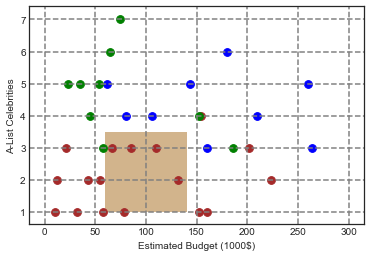

In [10]:
rule_extender = RuleExtender1(quant_dataset, min_conditional_improvement=-0.01)
rule_extender_original = RuleExtender(quant_dataset)

qrule_to_extend = quant_rules[0].copy()
qrule_to_extend.antecedent = [
    ("a-list-celebrities", Interval(2.5, 3.5, True, True)),
    ("estimated-budget", Interval(60, 140, True, True))
]





qrules_extended = rule_extender.transform_greedy([qrule_to_extend], skip_ahead=1)
#qrules_extended = rule_extender_original.transform([qrule_to_extend])
plotils.plot_quant_rules(qrules_extended)

In [11]:
quant_rules

[CAR {a-list-celebrities=<0.0;2.0)} => {class=box-office-bomb} sup: 0.31 conf: 1.00 len: 2, id: 1993,
 CAR {estimated-budget=<250.0;300.0)} => {class=main-stream-hit} sup: 0.06 conf: 1.00 len: 2, id: 1955,
 CAR {a-list-celebrities=<4.0;6.0),estimated-budget=<0.0;50.0)} => {class=critical-success} sup: 0.06 conf: 1.00 len: 3, id: 1975,
 CAR {a-list-celebrities=<6.0;8.0)} => {class=critical-success} sup: 0.03 conf: 1.00 len: 2, id: 1952,
 CAR {a-list-celebrities=<4.0;6.0),estimated-budget=<100.0;150.0)} => {class=main-stream-hit} sup: 0.03 conf: 1.00 len: 3, id: 1961,
 CAR {a-list-celebrities=<4.0;6.0),estimated-budget=<150.0;200.0)} => {class=main-stream-hit} sup: 0.03 conf: 1.00 len: 3, id: 1967,
 CAR {estimated-budget=<200.0;250.0)} => {class=box-office-bomb} sup: 0.06 conf: 0.67 len: 2, id: 1960,
 CAR {estimated-budget=<0.0;50.0)} => {class=box-office-bomb} sup: 0.14 conf: 0.62 len: 2, id: 1980,
 CAR {a-list-celebrities=<4.0;6.0)} => {class=main-stream-hit} sup: 0.11 conf: 0.50 len: 

In [12]:

refitted = qcba_transformation.refitter.transform(quant_rules)
literal_pruned = qcba_transformation.literal_pruner.transform(refitted)
trimmed = qcba_transformation.trimmer.transform(literal_pruned)
extended = qcba_transformation.extender.transform(trimmed)
#extended = rule_extender.transform_greedy(trimmed, skip_ahead=2)
post_pruned, default_class = qcba_transformation.post_pruner.transform(extended)
overlap_pruned = qcba_transformation.overlap_pruner.transform(post_pruned, default_class)


clf = QuantitativeClassifier(overlap_pruned, default_class)

clf.rule_model_accuracy(QuantitativeDataFrame(movies_train_undiscr), movies_train_undiscr.iloc[:, -1])

[                                                  ]
[#####                                             ]
[###########                                       ]
[################                                  ]
[######################                            ]
[###########################                       ]
[#################################                 ]
[######################################            ]
[############################################      ]


0.2571428571428571

Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=5
Rule count: 83, Iteration: 1
Increasing maxlen 4
Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=4, MAX_RULE_LEN=5
Rule count: 140, Iteration: 2
Increasing maxlen 5
Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 159, Iteration: 3
Decreasing confidence to 0.45
Running apriori with setting: confidence=0.45, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 159, Iteration: 4
Decreasing confidence to 0.4
Running apriori with setting: confidence=0.4, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 159, Iteration: 5
Decreasing confidence to 0.35000000000000003
Running apriori with setting: confidence=0.35000000000000003, support=0.0, minlen=2, maxlen=5, MAX_RULE_LEN=5
Rule count: 159, Iteration: 6
Decreasing confidence to 0.30000000000000004
Running apriori with setting: confidence=0.30000000

KeyboardInterrupt: 

In [ ]:
np.__version__

In [13]:
quant_rules_iris = [ QuantitativeCAR(r) for r in rm_cba.clf.rules ]
quant_dataset_train

qcba_transformation_iris = QCBATransformation(quant_dataset_train)
refitted = qcba_transformation_iris.refitter.transform(quant_rules_iris)
literal_pruned = qcba_transformation_iris.literal_pruner.transform(refitted)
trimmed = qcba_transformation_iris.trimmer.transform(literal_pruned)
extended = qcba_transformation_iris.extender.transform(trimmed)
post_pruned, default_class = qcba_transformation_iris.post_pruner.transform(extended)
overlap_pruned = qcba_transformation_iris.overlap_pruner.transform(post_pruned, default_class)

0
[                                                  ]


KeyboardInterrupt: 

In [ ]:
datasetname = "iris0"

pd_ds = pd.read_csv("c:/code/python/machine_learning/assoc_rules/train/{}.csv".format(datasetname))
    
    
pd_ds_undiscr = pd.read_csv("c:/code/python/machine_learning/assoc_rules/folds_undiscr/train/{}.csv".format(datasetname))
pd_ds_undiscr_test = pd.read_csv("c:/code/python/machine_learning/assoc_rules/folds_undiscr/test/{}.csv".format(datasetname))

txns = TransactionDB.from_DataFrame(pd_ds)
txns_test = TransactionDB.from_DataFrame(pd.read_csv("c:/code/python/machine_learning/assoc_rules/test/{}.csv".format(datasetname)))


rm_cba = CBA()
rm_cba.fit(txns)

rm_qcba = QCBA(rm_cba, QuantitativeDataFrame(pd_ds_undiscr))
qcba_clf = rm_qcba.fit()

applying selected transformations
refitting
literal pruning
trimming
extending
[              